In [27]:
link = 'https://api.thecatapi.com/v1/breeds'

In [29]:
import requests 
import csv

In [37]:
respond = requests.get(link)
cat_data= respond.json()

In [39]:
cat_data

[{'weight': {'imperial': '7  -  10', 'metric': '3 - 5'},
  'id': 'abys',
  'name': 'Abyssinian',
  'cfa_url': 'http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx',
  'vetstreet_url': 'http://www.vetstreet.com/cats/abyssinian',
  'vcahospitals_url': 'https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian',
  'temperament': 'Active, Energetic, Independent, Intelligent, Gentle',
  'origin': 'Egypt',
  'country_codes': 'EG',
  'country_code': 'EG',
  'description': 'The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.',
  'life_span': '14 - 15',
  'indoor': 0,
  'lap': 1,
  'alt_names': '',
  'adaptability': 5,
  'affection_level': 5,
  'child_friendly': 3,
  'dog_friendly': 4,
  'energy_level': 5,
  'grooming': 1,
  'health_issues': 2,
  'intelligence': 5,
  'shedding_level': 2,
  'social_needs': 5,
  'stranger_friendly': 5,
  'vocalisation': 1,
  'experimental': 0,
  'hairless': 0,
  'natural': 1,
  'rare'

In [65]:
with open('cat.csv','w',newline='',encoding='utf-8') as file:
    writer = csv.DictWriter(file,fieldnames=['name','origin','description','avg_life_span','avg_imperial','adaptability','intelligence'])
    writer.writeheader()
    for c in cat:
        name = c['name']
        origin = c['origin']
        description = c['description']
        life_span = c['life_span']
        minSpan,maxSpan = map(float,life_span.split(' - '))
        avg_life_span = (minSpan + maxSpan) / 2
        weight = c['weight']
        imperial = weight['imperial']
        minImp,maxImp = map(float,imperial.split(' - '))
        avg_imperial = (minImp + maxImp) / 2
        adaptability = c['adaptability']
        intelligence = c['intelligence']
        writer.writerow({'name':name,'origin':origin,'description':description,'avg_life_span':avg_life_span,'avg_imperial':avg_imperial,'adaptability':adaptability,'intelligence':intelligence})

In [69]:
import pandas as pd
df = pd.read_csv('cat.csv')
df.head(10)

,name,origin,description,avg_life_span,avg_imperial,adaptability,intelligence
0,Abyssinian,Egypt,"The Abyssinian is easy to care for, and a joy ...",14.5,8.5,5,5
1,Aegean,Greece,Native to the Greek islands known as the Cycla...,10.5,8.5,5,3
2,American Bobtail,United States,American Bobtails are loving and incredibly in...,13.0,11.5,5,5
3,American Curl,United States,Distinguished by truly unique ears that curl b...,14.0,7.5,5,3
4,American Shorthair,United States,The American Shorthair is known for its longev...,16.0,11.5,5,3
5,American Wirehair,United States,The American Wirehair tends to be a calm and t...,16.0,11.5,5,3
6,Arabian Mau,United Arab Emirates,Arabian Mau cats are social and energetic. Due...,13.0,12.0,5,3
7,Australian Mist,Australia,The Australian Mist thrives on human companion...,14.0,11.0,5,4
8,Balinese,United States,"Balinese are curious, outgoing, intelligent ca...",12.5,7.0,5,5
9,Bambino,United States,The Bambino is a breed of cat that was created...,13.0,6.5,5,5


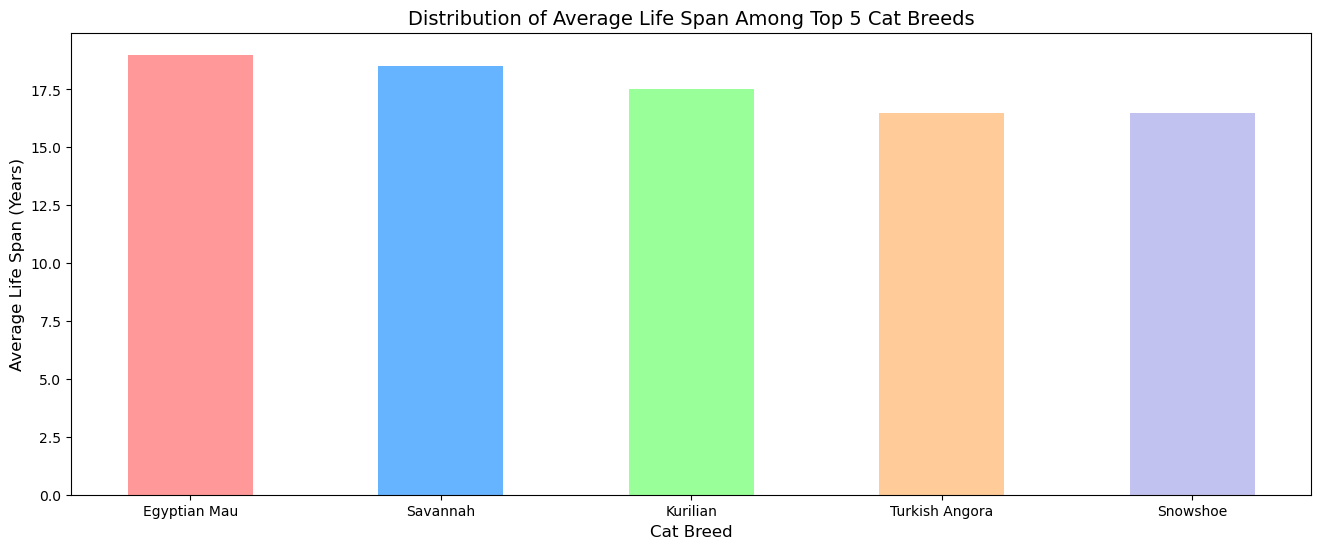

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cat.csv')
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0']

df_sorted = df.sort_values(by='avg_life_span', ascending=False)
top_5_breeds = df_sorted.head(5)

plt.figure(figsize=(16, 6))
plt.bar(top_5_breeds['name'], top_5_breeds['avg_life_span'],width=0.5,color=colors)
plt.xlabel('Cat Breed', fontsize=12)
plt.ylabel('Average Life Span (Years)', fontsize=12)
plt.title('Distribution of Average Life Span Among Top 5 Cat Breeds', fontsize=14)
plt.show()

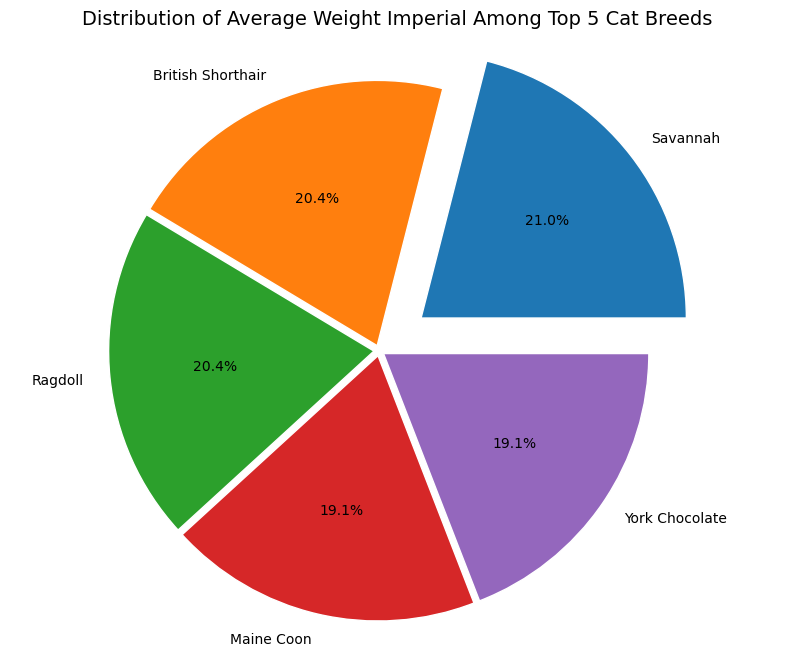

In [159]:
df_sorted = df.sort_values(by='avg_imperial', ascending=False)
top_5_breeds = df_sorted.head(5)
myExplode = [0.2,0.02,0.02,0.02,0.02]
plt.figure(figsize=(10, 8))
plt.pie(top_5_breeds['avg_imperial'],labels=top_5_breeds['name'],autopct='%1.1f%%', explode = myExplode, wedgeprops={'edgecolor': 'white'} )
plt.title('Distribution of Average Weight Imperial Among Top 5 Cat Breeds', fontsize=14)
plt.axis('equal')  
plt.show()